In [23]:
import fem2d as fem
import numpy as np
from scipy.linalg import solve_banded

# instantiate mesh
Nx = 100
Ny = 100
Lx = 1.0
Ly = 1.0

mesh = fem.TriangularMesh2D(Nx, Ny, Lx, Ly)
nodes, nx, ny = mesh.nodes, mesh.nx, mesh.ny
x = mesh.nodes[:,0].reshape(nx,ny)
y = mesh.nodes[:,1].reshape(nx,ny)

# inhomogeneity of the Poisson equation
def f(p):
    Lx = 1.0
    Ly = 1.0

    x = p[...,0]
    y = p[...,1]
    
    return -2.0 * ((x**2 - Lx*x) + (y**2 - Ly*y))
f_mesh = f(nodes).reshape(nx,ny)

# solution of the Poisson equation: rotation paraboloid
def u_ex(p):
    Lx = 1.0
    Ly = 1.0

    x = p[...,0]
    y = p[...,1]
    
    return (x**2 - Lx*x) * (y**2 - Ly*y)
u_ex_mesh = u_ex(nodes).reshape(nx,ny)

In [24]:
A_mat  = fem.stiffn(mesh)
b_vec  = fem.fv_int(mesh, f)
u = solve_banded((nx,nx), A_mat, b_vec).reshape(nx,ny)

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

def plotter3D(X, Y, Z1, Z2, Z3):
    """Plotter function for the inhomogeneity and the solution of the Poisson equation"""
    fig = plt.figure(figsize=(9.6, 3.0))
    fig.suptitle("Poisson equation", y= 0.95, fontsize=14)

    # first subplot: f(x, y), inhomogeneity of the Poisson equation
    ax = fig.add_axes((0.0, 0.13, 0.5, 0.8), projection='3d')
    ax.set_title("inhomogeneity", y=-0.15)
    ax.tick_params(labelsize=8, pad=-2)
    ax.set_xlabel('x', labelpad=-4)
    ax.set_ylabel('y', labelpad=-4)
    ax.text2D(0.90, 0.85, "f(x,y)", transform=ax.transAxes)
    ax.plot_wireframe(X, Y, Z1, linewidths=0.5)

    # second subplot: u, solution of the linear system
    ax = fig.add_axes((0.31, 0.13, 0.5, 0.8), projection='3d')
    ax.set_title("FEM solution", y=-0.15)
    ax.tick_params(labelsize=8, pad=-2)
    ax.tick_params('z', pad=4)
    ax.set_xlabel('x', labelpad=-4)
    ax.set_ylabel('y', labelpad=-4)
    ax.text2D(0.90, 0.85, "u(x,y)", transform=ax.transAxes)
    ax.plot_wireframe(X, Y, Z2, linewidths=0.5)

    ax = fig.add_axes((0.64, 0.13, 0.5, 0.8), projection='3d')
    ax.set_title("analytical solution", y=-0.15)
    ax.tick_params(labelsize=8, pad=-2)
    ax.tick_params('z', pad=4)
    ax.set_xlabel('x', labelpad=-4)
    ax.set_ylabel('y', labelpad=-4)
    ax.text2D(0.90, 0.85, "u_ex(x,y)", transform=ax.transAxes)
    ax.plot_wireframe(X, Y, Z3, linewidths=0.5)

    # plt.savefig("poisson.png")
    plt.show()

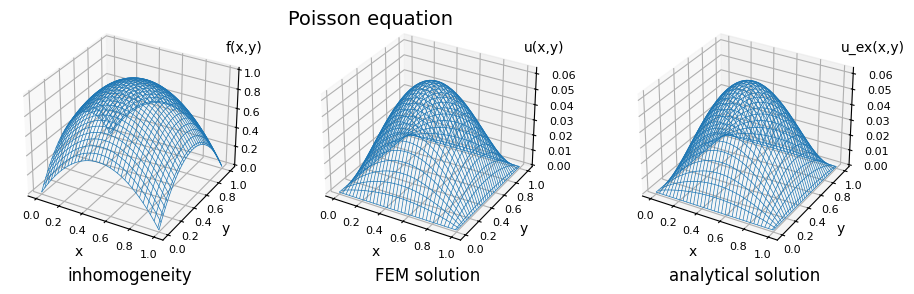

In [38]:
plotter3D(x, y, f_mesh, u, u_ex_mesh)

In [39]:
u

array([[4.90051856e-15, 9.80108613e-10, 1.94040772e-09, ...,
        1.94040772e-09, 9.80108613e-10, 4.90051856e-15],
       [9.80108613e-10, 9.80118513e-05, 1.94042723e-04, ...,
        1.94042723e-04, 9.80118513e-05, 9.80108613e-10],
       [1.94040772e-09, 1.94042723e-04, 3.84163512e-04, ...,
        3.84163512e-04, 1.94042723e-04, 1.94040772e-09],
       ...,
       [1.94040772e-09, 1.94042723e-04, 3.84163512e-04, ...,
        3.84163512e-04, 1.94042723e-04, 1.94040772e-09],
       [9.80108613e-10, 9.80118513e-05, 1.94042723e-04, ...,
        1.94042723e-04, 9.80118513e-05, 9.80108613e-10],
       [4.90051856e-15, 9.80108613e-10, 1.94040772e-09, ...,
        1.94040772e-09, 9.80108613e-10, 4.90051856e-15]])

In [40]:
u_ex_mesh

array([[ 0.0000e+00, -0.0000e+00, -0.0000e+00, ..., -0.0000e+00,
        -0.0000e+00,  0.0000e+00],
       [-0.0000e+00,  9.8010e-05,  1.9404e-04, ...,  1.9404e-04,
         9.8010e-05, -0.0000e+00],
       [-0.0000e+00,  1.9404e-04,  3.8416e-04, ...,  3.8416e-04,
         1.9404e-04, -0.0000e+00],
       ...,
       [-0.0000e+00,  1.9404e-04,  3.8416e-04, ...,  3.8416e-04,
         1.9404e-04, -0.0000e+00],
       [-0.0000e+00,  9.8010e-05,  1.9404e-04, ...,  1.9404e-04,
         9.8010e-05, -0.0000e+00],
       [ 0.0000e+00, -0.0000e+00, -0.0000e+00, ..., -0.0000e+00,
        -0.0000e+00,  0.0000e+00]])